In [1]:
import data_preparation as dp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import cv2 as cv
from layers import Conv, ReLU, MaxPool, Flatten, Dense, MSELoss
import custom_model
import main

In [2]:
sources = [
    ("./data/original/plates.csv", "./data/original/photos/"),
    ("./data/original/flipped_plates.csv", "./data/original/flipped_photos/"),
    ("./data/original/noise_plates.csv", "./data/original/noise_photos/"),
    ("./data/original/flipped_noise_plates.csv", "./data/original/flipped_noise_photos/")
]

In [3]:
img_width = 320
img_height = 200
learning_rate = 0.001

In [4]:
X_train, Y_train, X_test, Y_test, X_val, Y_val, true_size_train, true_size_test, true_size_val, filename_train, filename_test, filename_val = dp.load_data(sources, img_width, img_height)

Data loaded.


In [5]:
X = X_train[:4]
Y = Y_train[:4]
X_val = X_val[:2]
true_size_train = true_size_train[:4]
true_size_val = true_size_val[:2]
filename_train = filename_train[:4]
filename_val = filename_val[:2]
print(filename_train)
print(filename_val)

['noise_96.jpg' '19.jpg' '90.jpg' 'flip_68.jpg']
['noise_flip_92.jpg' 'flip_167.jpg']


In [6]:
cnn = custom_model.CNN()

Convolutional Neural Network initialized.


In [7]:
cnn.add_layer(Conv(8, 3, 1))
cnn.add_layer(ReLU())
cnn.add_layer(MaxPool(2))
cnn.add_layer(Conv(16, 3, 8))
cnn.add_layer(ReLU())
cnn.add_layer(MaxPool(2))
cnn.add_layer(Flatten())
cnn.add_layer(Dense(59904, 16))
cnn.add_layer(Dense(16, 8))
cnn.add_layer(Dense(8, 4))

In [8]:
cnn.print_model_structure()

Model structure:
1. Conv(kernels=8, filter_size=3, channels=1)
2. ReLU()
3. MaxPool(filter_size=2)
4. Conv(kernels=16, filter_size=3, channels=8)
5. ReLU()
6. MaxPool(filter_size=2)
7. Flatten()
8. Dense(input_size=59904, output_size=16)
9. Dense(input_size=16, output_size=8)
10. Dense(input_size=8, output_size=4)


In [9]:
cnn.summary(X.shape)

Layer (type)    Output Shape              Param #        
Conv            (None, 198, 318, 8)       80             
ReLU            (None, 198, 318, 8)       0              
MaxPool         (None, 99, 159, 8)        0              
Conv            (None, 97, 157, 16)       1168           
ReLU            (None, 97, 157, 16)       0              
MaxPool         (None, 48, 78, 16)        0              
Flatten         (None, 59904)             0              
Dense           (None, 16)                958480         
Dense           (None, 8)                 136            
Dense           (None, 4)                 36             
Total params: 959900


In [10]:
loss_fn = MSELoss()

In [11]:
loss_per_epochs_train, loss_per_epochs_val, accuracy_per_epoch_train, accuracy_per_epoch_val, rescaled_bboxs_predicted_list, rescaled_bboxs_original_list = cnn.train(X, Y, true_size_train, X_val, Y_val, true_size_val, 2, loss_fn, 25, 0.001)

Training process...
Epoch 1/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.32s | loss: 0.123755 | accuracy (IoU): 0.000000 | val_loss: 0.172966 | val_accuracy (IoU): 0.000000
Epoch 2/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.07s | loss: 0.112685 | accuracy (IoU): 0.000000 | val_loss: 0.159751 | val_accuracy (IoU): 0.000000
Epoch 3/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.08s | loss: 0.103649 | accuracy (IoU): 0.000000 | val_loss: 0.148604 | val_accuracy (IoU): 0.000000
Epoch 4/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 12.99s | loss: 0.096014 | accuracy (IoU): 0.000000 | val_loss: 0.139045 | val_accuracy (IoU): 0.000000
Epoch 5/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 14.48s | loss: 0.089425 | accuracy (IoU): 0.000000 | val_loss: 0.130714 | val_accuracy (IoU): 0.000000
Epoch 6/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.19s | loss: 0.083607 | accuracy (IoU): 0.000000 | val_loss: 0.123387 | val_accuracy (IoU): 0.000000
Epoch 7/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.13s | loss: 0.078406 | accuracy (IoU): 0.000000 | val_loss: 0.116857 | val_accuracy (IoU): 0.000000
Epoch 8/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.10s | loss: 0.073708 | accuracy (IoU): 0.000000 | val_loss: 0.110994 | val_accuracy (IoU): 0.000000
Epoch 9/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.12s | loss: 0.069406 | accuracy (IoU): 0.000000 | val_loss: 0.105660 | val_accuracy (IoU): 0.000000
Epoch 10/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.15s | loss: 0.065458 | accuracy (IoU): 0.000000 | val_loss: 0.100792 | val_accuracy (IoU): 0.000000
Epoch 11/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 14.15s | loss: 0.061823 | accuracy (IoU): 0.000000 | val_loss: 0.096341 | val_accuracy (IoU): 0.000000
Epoch 12/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.27s | loss: 0.058452 | accuracy (IoU): 0.000000 | val_loss: 0.092243 | val_accuracy (IoU): 0.000000
Epoch 13/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.06s | loss: 0.055312 | accuracy (IoU): 0.000000 | val_loss: 0.088441 | val_accuracy (IoU): 0.000000
Epoch 14/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.17s | loss: 0.052378 | accuracy (IoU): 0.000000 | val_loss: 0.084914 | val_accuracy (IoU): 0.000000
Epoch 15/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.11s | loss: 0.049629 | accuracy (IoU): 0.000000 | val_loss: 0.081634 | val_accuracy (IoU): 0.000000
Epoch 16/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.20s | loss: 0.047041 | accuracy (IoU): 0.000000 | val_loss: 0.078560 | val_accuracy (IoU): 0.000000
Epoch 17/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.23s | loss: 0.044611 | accuracy (IoU): 0.000000 | val_loss: 0.075678 | val_accuracy (IoU): 0.000000
Epoch 18/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.79s | loss: 0.042318 | accuracy (IoU): 0.000000 | val_loss: 0.072977 | val_accuracy (IoU): 0.000000
Epoch 19/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.33s | loss: 0.040156 | accuracy (IoU): 0.000000 | val_loss: 0.070447 | val_accuracy (IoU): 0.000000
Epoch 20/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.22s | loss: 0.038111 | accuracy (IoU): 0.000000 | val_loss: 0.068069 | val_accuracy (IoU): 0.000000
Epoch 21/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.15s | loss: 0.036178 | accuracy (IoU): 0.000000 | val_loss: 0.065831 | val_accuracy (IoU): 0.000000
Epoch 22/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.23s | loss: 0.034357 | accuracy (IoU): 0.000000 | val_loss: 0.063729 | val_accuracy (IoU): 0.000000
Epoch 23/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 13.02s | loss: 0.032635 | accuracy (IoU): 0.000000 | val_loss: 0.061753 | val_accuracy (IoU): 0.000000
Epoch 24/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 12.99s | loss: 0.031001 | accuracy (IoU): 0.000000 | val_loss: 0.059892 | val_accuracy (IoU): 0.000000
Epoch 25/25


Training [===============================================================] 100%
Validation [=============================================================] 100%


time: 12.91s | loss: 0.029457 | accuracy (IoU): 0.000000 | val_loss: 0.058136 | val_accuracy (IoU): 0.000000

Training time: 331.50 seconds.


In [12]:
cnn.save_parameters("custom_model_parameters.npz")

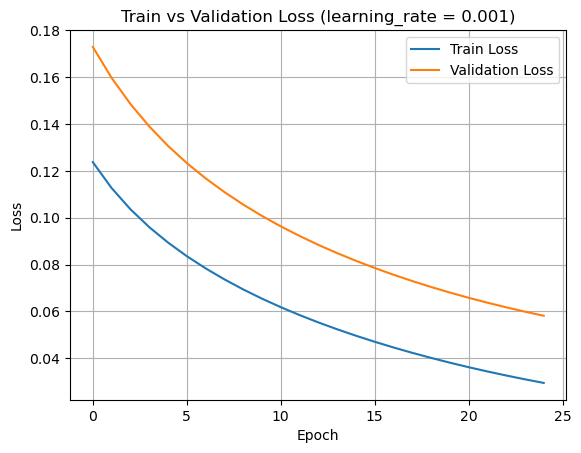

In [13]:
cnn.plot_loss_for_learning(loss_per_epochs_train, loss_per_epochs_val, learning_rate)

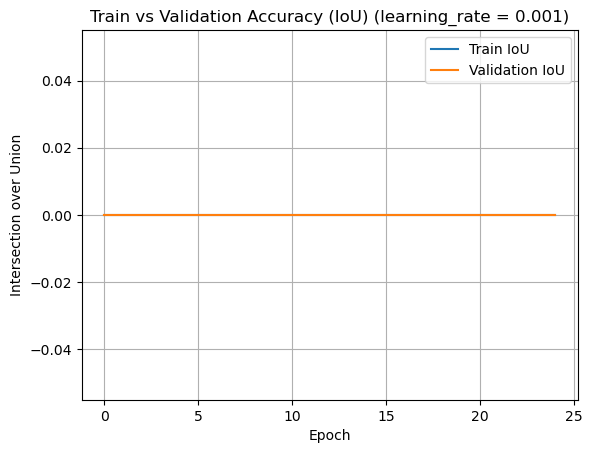

In [14]:
cnn.plot_accuracy_for_learning(accuracy_per_epoch_train, accuracy_per_epoch_val, learning_rate)

In [15]:
print(rescaled_bboxs_predicted_list)
print(rescaled_bboxs_original_list)

[[1034.548482607096, 541.8751396188895, 961.6219068496353, -195.56346370851202], [2157.200345005177, 757.0396547200496, 1062.9849730614912, -9.754860364262328], [2065.83941219997, 298.1112073938154, 1459.783316619119, 262.2961638908991], [2010.146823628445, 440.70330256899126, 2254.54988340911, -164.56242197135225]]
[[1651.1600360870361, 622.4600031971931, 1935.4100260734558, 703.4199804663658], [1752.800006866455, 398.7500034570694, 2110.1000213623047, 506.6000003814697], [2171.130018234253, 424.4300068616867, 2501.7099285125732, 513.7700107097626], [2156.729941368103, 448.7799961566925, 2468.619966506958, 543.2499833106995]]


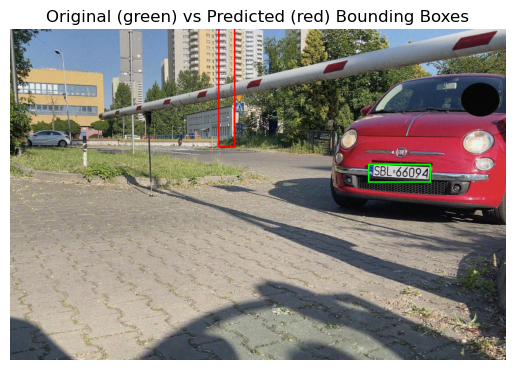

In [16]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_path = './data/original/noise_photos/noise_96.jpg'
image = cv2.imread(img_path)

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bounding boxes
predicted = rescaled_bboxs_predicted_list[0]
original  = rescaled_bboxs_original_list[0]

# Convert to int
predicted = list(map(int, predicted))
original = list(map(int, original))

# Draw original bbox (GREEN)
cv2.rectangle(image_rgb, (original[0], original[1]), (original[2], original[3]), (0, 255, 0), 6)

# Draw predicted bbox (RED)
cv2.rectangle(image_rgb, (predicted[0], predicted[1]), (predicted[2], predicted[3]), (255, 0, 0), 6)

# Show the image
plt.imshow(image_rgb)
plt.title("Original (green) vs Predicted (red) Bounding Boxes")
plt.axis("off")
plt.show()

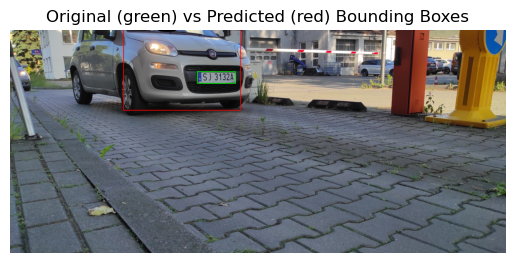

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
img_path = './data/original/photos/19.jpg'
image = cv2.imread(img_path)

# Convert to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bounding boxes
predicted = rescaled_bboxs_predicted_list[1]
original  = rescaled_bboxs_original_list[1]

# Convert to int
predicted = list(map(int, predicted))
original = list(map(int, original))

# Draw original bbox (GREEN)
cv2.rectangle(image_rgb, (original[0], original[1]), (original[2], original[3]), (0, 255, 0), 6)

# Draw predicted bbox (RED)
cv2.rectangle(image_rgb, (predicted[0], predicted[1]), (predicted[2], predicted[3]), (255, 0, 0), 6)

# Show the image
plt.imshow(image_rgb)
plt.title("Original (green) vs Predicted (red) Bounding Boxes")
plt.axis("off")
plt.show()

In [18]:
cnn2 = custom_model.CNN()

Convolutional Neural Network initialized.


In [19]:
params = custom_model.CNN.load_parameters("custom_model_parameters.npz")